In [43]:
import pandas as pd
import numpy as np

**Представьте, что вы аналитик в сервисе такси. Ваша задача – написать функцию haversine 
для подсчета расстояния между пунктами отправления и прибытия и,  
используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием.**

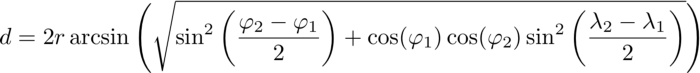

**Таким образом, сама функция haversine() должна принимать на вход 5 параметров, 
один из которых должен иметь значение по умолчанию.**

In [55]:
nyc = pd.read_csv('nyc.csv.zip', compression='zip')

In [37]:
def haversine(p_long, p_lat,  d_long , d_lat, radius=6371):
    """ Принимает широту и долготу пункта A и пункта B.
        Параметр radius задан по умолчанию
    """
    p_long, p_lat,  d_long , d_lat = map(np.radians, [p_long, p_lat,  d_long , d_lat]) # перевод координат в радианы через map
    diff_long = d_long - p_long 
    diff_lat = d_lat - p_lat # Первое просто вычисление по формуле
    
    a = np.sin(diff_lat / 2.0)**2 + np.cos(p_lat) * np.cos(d_lat) * np.sin(diff_long / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    d = radius * c # Сложные вычисления по формуле, через numpy
    
    return d

In [38]:
%%time
nyc['distance'] = pd.Series(haversine(row.pickup_longitude,
                                      row.pickup_latitude,
                                      row.dropoff_longitude,
                                      row.dropoff_latitude) for i, row in nyc.iterrows())

CPU times: user 7.58 s, sys: 37.5 ms, total: 7.62 s
Wall time: 7.61 s


In [39]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


**Задача: проделайте ту же операцию, что и в предыдущем шаге, но уже используя pd.itertuples(), 
а затем сравните время выполнения.**

In [47]:
def haversine(p_long, p_lat,  d_long, d_lat, radius=6371):
    p_long, p_lat,  d_long , d_lat = map(np.radians, [p_long, p_lat,  d_long , d_lat])
    diff_long = d_long - p_long
    diff_lat = d_lat - p_lat
    
    a = np.sin(diff_lat / 2.0)**2 + np.cos(p_lat) * np.cos(d_lat) * np.sin(diff_long / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    d = radius * c
    
    return d

In [67]:
%%time
nyc['distance'] = pd.Series(haversine(row.pickup_longitude,
                                      row.pickup_latitude,
                                      row.dropoff_longitude,
                                      row.dropoff_latitude) for row in nyc.itertuples())

CPU times: user 1.13 s, sys: 11.6 ms, total: 1.14 s
Wall time: 1.13 s


In [66]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


**Еще один часто используемый метод pd.apply().
В столбец distance датафрейма nyc сохраните результат подсчета расстояния между точками отправки и прибытия, 
используя написанную ранее функцию. В переменную longest сохраните самое большое расстояние. 
Не забудьте проверить скорость выполнения операции**

In [60]:
nyc['distance'] = nyc[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]\
    .apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

In [63]:
longest = nyc.distance.max()

In [64]:
longest

8667.818812217458

In [65]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
